In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.cm import PiYG
from sklearn.preprocessing import MinMaxScaler
from pyfonts import load_font
from matplotlib.colorbar import ColorbarBase
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("reigious_beliefs.csv")

In [3]:
df.head()

,Unnamed: 0,Are religiously affiliated,Say religion is very important in their lives,Say they believe in God,Say animals can have spirits or spiritual energies,"Say that parts of nature, like mountains, rivers or trees, can have spirits or spiritual energies","Say certain objects, like crystals, jewels or stones, can have spirits or spiritual energies","Say there is something spiritual beyond the natural world, even if we cannot see it",Say there is definitely or probably life after death,Believe the spirits of ancestors can help or hurt them,Believe in reincarnation,"Believe that spells, curses or other magic can influence people's lives",Say they pray at least daily,Say they attend religious services at least monthly,Say they fast for certain periods during holy times,"Say they consult a fortune teller, horoscope or other way to see the future",Say they light incense or candles for spiritual or religious reasons,Say they wear or carry religious items or symbols with them
0,U.S.,69,38,78,57,48,26,79,70,36,31,30,44,33,21,9,20,31
1,Canada,57,26,60,56,47,25,69,56,39,29,29,30,26,16,10,20,22
2,France,53,18,53,67,52,33,64,55,40,26,45,18,16,20,13,20,19
3,Germany,57,16,56,53,49,24,57,50,32,25,28,16,15,15,7,22,15
4,Greece,86,32,80,82,48,12,69,56,24,25,27,37,32,58,4,51,57


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 18 columns):
 #   Column                                                                                             Non-Null Count  Dtype 
---  ------                                                                                             --------------  ----- 
 0   Unnamed: 0                                                                                         36 non-null     object
 1   Are religiously affiliated                                                                         36 non-null     int64 
 2   Say religion is very important in their lives                                                      36 non-null     int64 
 3   Say they believe in God                                                                            36 non-null     object
 4   Say animals can have spirits or spiritual energies                                                 36 non-null     object
 5   Say

In [5]:
df= df.replace(to_replace="--",value=0)

In [6]:
df =df.rename(columns={"Unnamed: 0": "country"})

In [7]:
for col in  df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [8]:
df["score"] = df.iloc[:, 1:].cumsum(axis=1).iloc[:, -1]

In [9]:
df = df.sort_values(by="score", ascending=False, ignore_index=True)

In [10]:
attributes = df.columns.drop(["country", "score"])
# Fit MinMaxScaler on each attribute 
norms = {attr: MinMaxScaler((0, 1)).fit(df[[attr]]) for attr in attributes}

In [11]:
arizonia = load_font(
  font_url="https://github.com/google/fonts/blob/main/ofl/arizonia/Arizonia-Regular.ttf?raw=true"
)

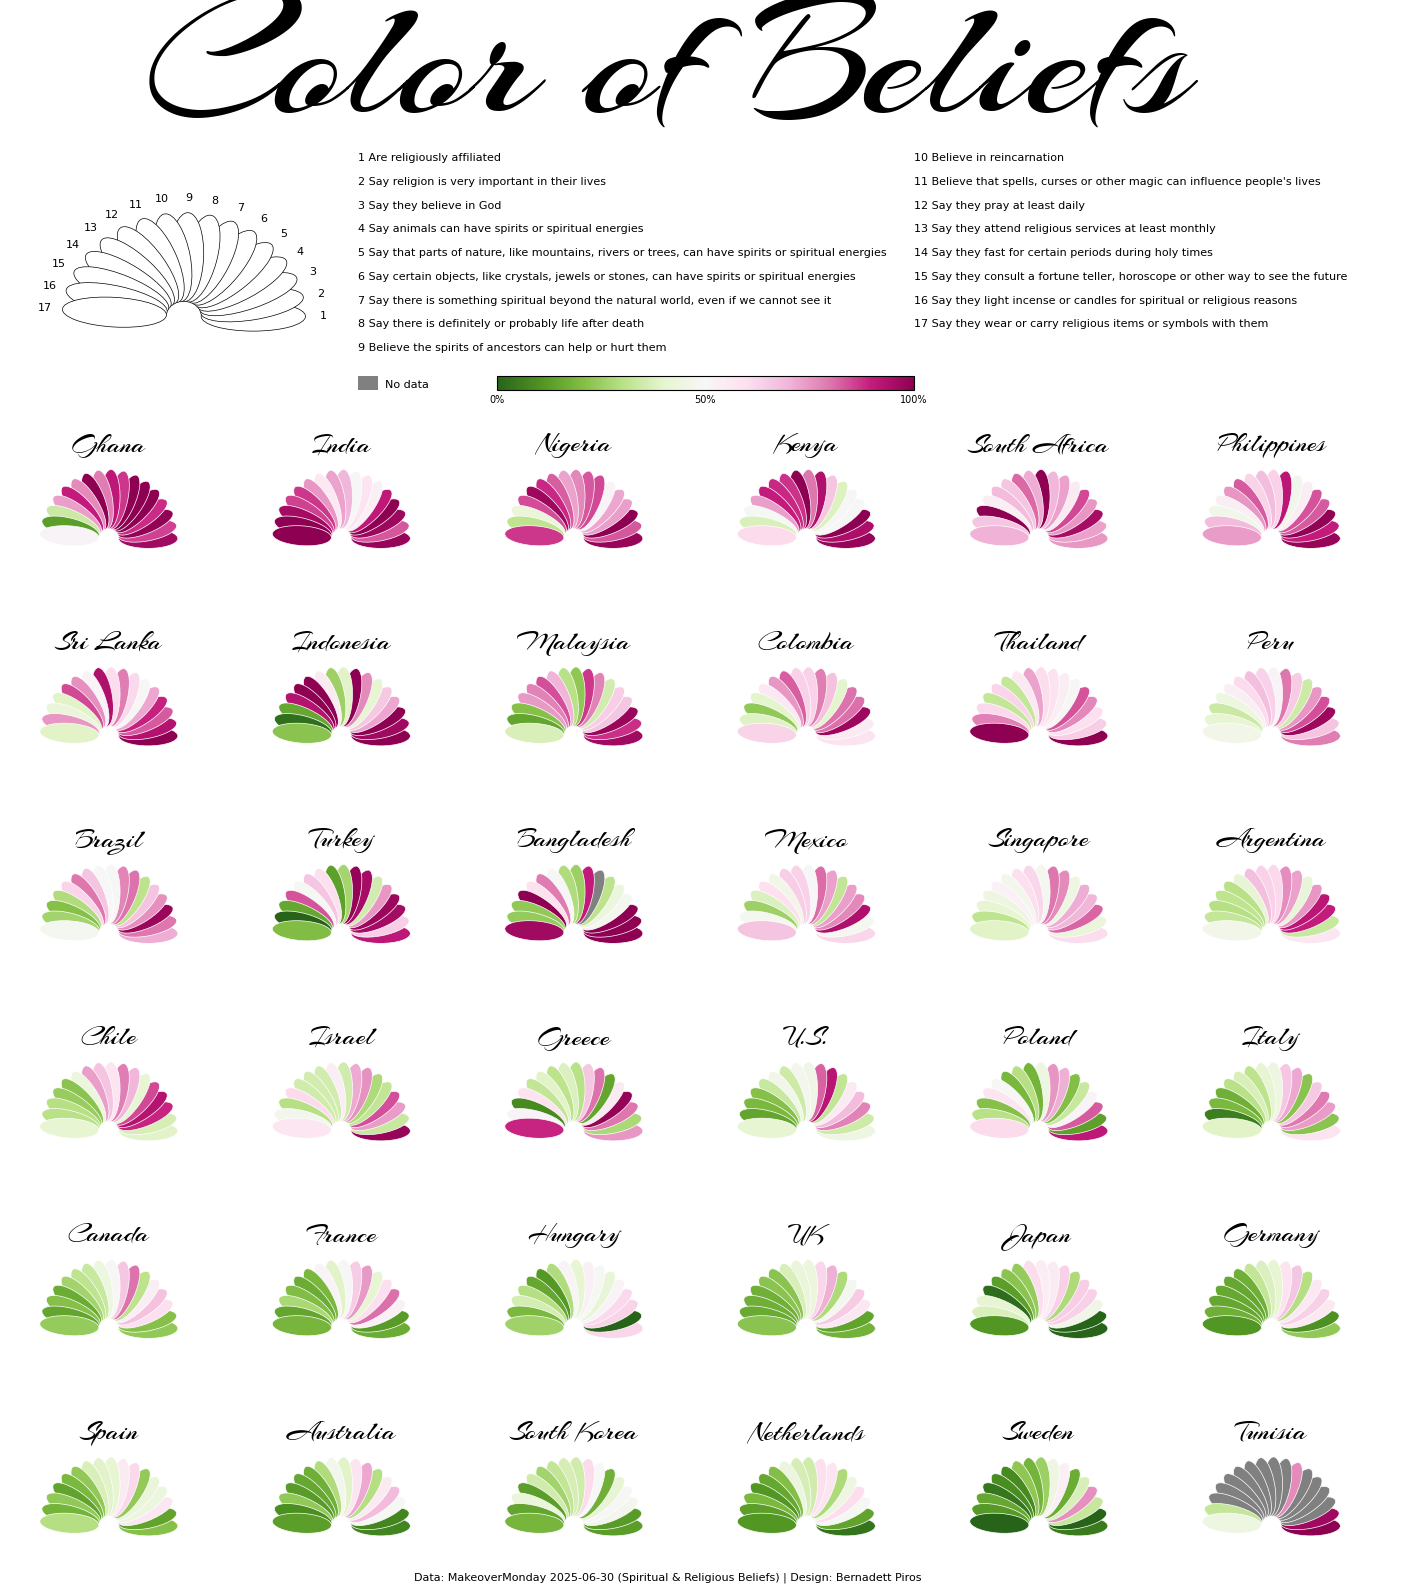

In [12]:
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(18, 15), gridspec_kw={"wspace": 0, "hspace": 0})
plt.subplots_adjust(top=0.9) 
axes = axes.flatten()

for idx, row in df.iterrows():
    ax = axes[idx]   
    ax.set_title(row["country"], y=0.6, font=arizonia, size=20)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect("equal")
    ax.axis("off")    
    
    cx, cy = 0.5, 0.2  
    radius = 0.2    
    num_ellipses = 17

    # Loop through each attribute and create ellipses 
    for i, attr in enumerate(attributes):        
        attr_value = row[attr]
        
        # Assign grey color where attribute value=0
        if attr_value == 0:
            color = "grey"  
        else:
            # Normalize the value 
            norm_value = norms[attr].transform([[attr_value]])[0][0]  
            # Map the normalized value to a color
            color = plt.cm.PiYG_r(norm_value)  
        
        angle_deg = i * 11        

        # Ellipse position and properties
        theta = np.radians(angle_deg)
        x = cx + radius * np.cos(theta)
        y = cy + radius * np.sin(theta)

        # Create ellipse 
        ellipse = patches.Ellipse(
            xy=(x, y),
            width=0.3,
            height=0.1,
            angle=angle_deg,  
            facecolor=color,
            edgecolor="white",
            lw=0.5
        )
        ax.add_patch(ellipse)        

# Legend
child_ax = axes[0].inset_axes([0, 0.8, 7.04, 1.5])
child_ax.axis("off")
grand_child_ax = child_ax.inset_axes([0, 0, 0.25, 1])
grand_child_ax.axis("off")

cx, cy = 0.5, 0.35  

for i in range(num_ellipses):
    angle_deg = i * 11
    theta = np.radians(angle_deg)
    
    x = cx + radius * np.cos(theta)
    y = cy+ radius * np.sin(theta)

    ellipse = patches.Ellipse(
        xy=(x, y),
        width=0.3,
        height=0.1,
        angle=angle_deg,  
        facecolor="white",
        edgecolor="black",
        lw=0.5
    )
    grand_child_ax.add_patch(ellipse)        

    # Adjust label position 
    offset_x = 0.2 * np.cos(theta)  
    offset_y = 0.2 * np.sin(theta)  
    grand_child_ax.text(x + offset_x, y + offset_y, str(i+1), ha='center', va='center', fontsize=8, color='black')


# Enumeration with two columns
text_lines = []
for i in range(len(attributes)):    
    text_lines.append(f"{i+1} {attributes[i]}")    

# Split into two columns 
num_rows = len(attributes) // 2
if len(attributes) % 2 != 0:
    num_rows += 1

# Format the output into two columns
col1 = [text_lines[i] for i in range(num_rows)]
col2 = [text_lines[i + num_rows] if i + num_rows < len(text_lines) else "" for i in range(num_rows)]


# Plot the two columns of enumerated text
for i, (t1, t2) in enumerate(zip(col1, col2)):
    child_ax.text(0.25, 1 - (i*0.08)-0.1, t1, ha="left", va="top", fontsize=8)
    child_ax.text(0.65, 1 - (i*0.08)-0.1, t2, ha="left", va="top", fontsize=8)


cbar_ax = child_ax.inset_axes([0.35, 0.1, 0.3, 0.05])
cb = ColorbarBase(cbar_ax, cmap="PiYG_r", orientation="horizontal")
cb.ax.tick_params(size=0, labelsize=7)
location=[0, 0.5, 1]
labels=["0%", "50%", "100%"]
cb.ax.set_xticks(location, labels=labels)

grey_ax = child_ax.inset_axes([0.25, 0.1, 0.015, 0.05], facecolor="grey")
grey_ax.spines[["top", "right", "bottom", "left"]].set_visible(False)
grey_ax.tick_params(length=0)
grey_ax.set_xticks([])
grey_ax.set_yticks([])

child_ax.text(0.27, 0.1, "No data", size=8, va="bottom")
        
fig.text(0.5, 1.08, "Color of Beliefs", font=arizonia, size=130, ha="center")

fig.text(0.5, 0.1, "Data: MakeoverMonday 2025-06-30 (Spiritual & Religious Beliefs) | Design: Bernadett Piros", size=8, ha="center")

plt.show()

#fig.savefig("2025-06-30.png", bbox_inches='tight', pad_inches=0.2)